In [1]:
# bringing in data from json/ directory

import json

scientific_articles = json.loads(open('json/science.json').read())
conspiracy_articles = json.loads(open('json/conspiracy.json').read())

print(len(scientific_articles), len(conspiracy_articles))

min_len = min(len(scientific_articles), len(conspiracy_articles))
scientific_articles = scientific_articles[:min_len]
conspiracy_articles = conspiracy_articles[:min_len]

257 454


In [2]:
# splitting articles between training and test sets twice, once for the scientific ones and once for the conspiracy ones

from sklearn.model_selection import train_test_split

training_science_set, test_science_set = train_test_split(scientific_articles, test_size = 0.2, random_state = 1)
training_conspiracy_set, test_conspiracy_set = train_test_split(conspiracy_articles, test_size = 0.2, random_state = 1)

In [3]:
len(training_science_set + training_conspiracy_set)

410

In [4]:
len(test_science_set + test_conspiracy_set)

104

In [5]:
from bagOfWords import BagOfWords

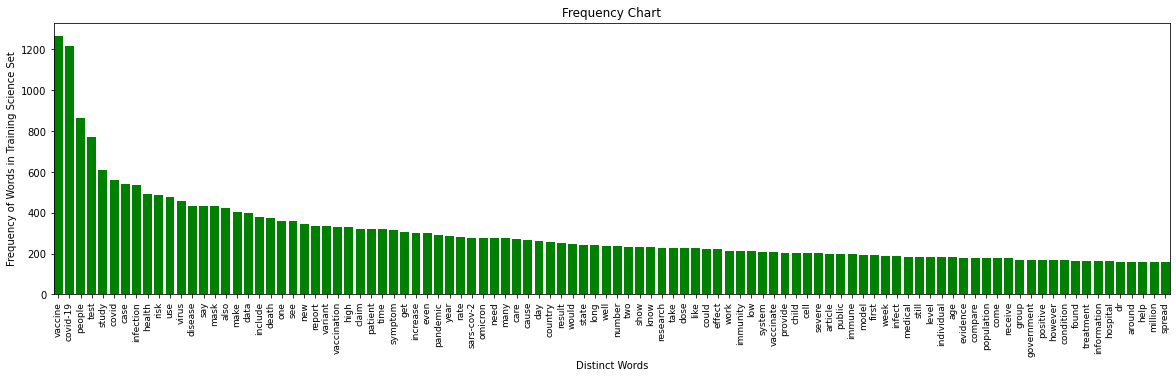

In [6]:
# creating an instance of the BagOfWords class for the scientific articles training set

science_train = BagOfWords(training_science_set, "Training Science Set")

science_train.tokenize()
science_train.to_lower_case()
science_train.clean_data()
science_train.remove_stop_words()
science_train.normalize_words() # todo: improve part of speech performance
science_train.create_frequency_chart()
science_train.plot_frequency_chart()

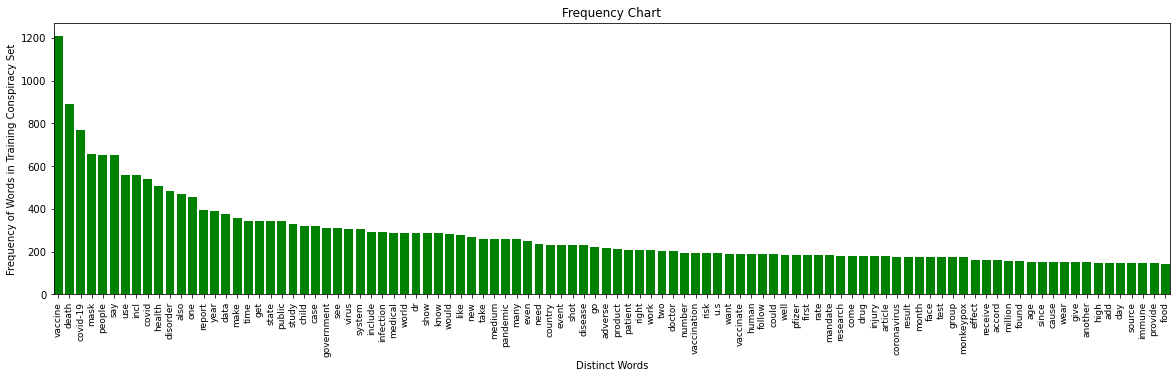

In [7]:
# creating an instance of the BagOfWords class for the conspiracy articles training set

conspiracy_train = BagOfWords(training_conspiracy_set, "Training Conspiracy Set")

conspiracy_train.tokenize()
conspiracy_train.to_lower_case()
conspiracy_train.clean_data()
conspiracy_train.remove_stop_words()
conspiracy_train.normalize_words() # todo: improve part of speech performance
conspiracy_train.create_frequency_chart()
conspiracy_train.plot_frequency_chart()

In [9]:
def get_common_words(a: BagOfWords, b: BagOfWords):
    # determine common words between the two sets of words
    common_words = dict()
    for word, count in a.freqChart.items():
        if word in b.freqChart:
            diff_count = count - b.freqChart[word]
            common_words[word] = diff_count/(count + b.freqChart[word])

    # remove all with count 0 
    common_words = dict(filter(lambda elem: elem[1] != 0, common_words.items()))

    # sorting the dictionary in descending order
    common_words = {word: common_words[word] for word in sorted(common_words, key=common_words.get, reverse=True)}

    return common_words

In [10]:
common_words = get_common_words(science_train, conspiracy_train)

In [11]:
common_words

{'jackson': 0.9864864864864865,
 'ba.5': 0.974025974025974,
 'ba.2': 0.9591836734693877,
 'at-home': 0.9555555555555556,
 'adhd': 0.9534883720930233,
 'ba.4': 0.9487179487179487,
 'adjust': 0.9375,
 'pot': 0.9325842696629213,
 'screen': 0.9322033898305084,
 'eligibility': 0.9310344827586207,
 'gut': 0.9285714285714286,
 'meteor': 0.9259259259259259,
 'payment': 0.9166666666666666,
 'paris': 0.9166666666666666,
 'pericarditis': 0.9130434782608695,
 'pre-existing': 0.9130434782608695,
 'creative': 0.9130434782608695,
 'mixed': 0.9090909090909091,
 'loop': 0.9090909090909091,
 'limitation': 0.9090909090909091,
 'interval': 0.90625,
 'pediatrics': 0.9,
 'cardiovascular': 0.9,
 'polio': 0.9,
 'ama': 0.8918918918918919,
 'variation': 0.8888888888888888,
 'copper': 0.8888888888888888,
 'swab': 0.8888888888888888,
 'analogy': 0.8888888888888888,
 'subgroup': 0.8867924528301887,
 'brook': 0.8857142857142857,
 'kn95': 0.8857142857142857,
 'fluid': 0.8823529411764706,
 'cervical': 0.8823529411764

In [12]:
print(len(common_words), sep = ', ')
print(sum(y > 0 for _, y in common_words.items()))
print(sum(y < 0 for _, y in common_words.items()))

4446
2173
2273


In [13]:
def get_relevant_words(common_words, num_words = 500):
    # extract 'num_words' most common words
    sorted_words = []
    for key, value in common_words.items():
        sorted_words.append([abs(value), key])
    sorted_words.sort(reverse=True)

    # take 20 with highest magnitudes  
    relevant_words = sorted_words[:num_words]

    # give the sign back
    for word in relevant_words:
        word[0] = common_words[word[1]]

    relevant_words.sort()
    return [e[1] for e in relevant_words]

In [14]:
train_relevant_words = get_relevant_words(common_words, 300)

In [15]:
train_relevant_words

['god',
 'intelligence',
 'sars',
 'interview',
 'mainstream',
 'crime',
 'arrest',
 'bbc',
 'pharma',
 'nutrition',
 'establishment',
 'georgia',
 'farmer',
 'wilson',
 'infestation',
 'musculoskeletal',
 'neoplasm',
 'okay',
 'subcutaneous',
 'thoracic',
 'inject',
 'strike',
 'blame',
 'dollar',
 'toddler',
 'injured',
 'defender',
 'facemasks',
 'hidden',
 'military',
 'guy',
 'airway',
 'brian',
 'secret',
 'birth',
 'ema',
 'urbani',
 'british',
 'carolina',
 'regulator',
 'scott',
 'suspend',
 'wife',
 'sars-cov',
 'casualty',
 'ineffective',
 'metal',
 'toxicity',
 'yesterday',
 'reproductive',
 'mother',
 'anymore',
 'censor',
 'chart',
 'description',
 'guard',
 'herb',
 'hide',
 'print',
 'reset',
 'sperm',
 'narrative',
 'campaign',
 'refuse',
 'hurt',
 'journalism',
 'kennedy',
 'nerve',
 'perfect',
 'reinstate',
 'vascular',
 'disorder',
 'fetal',
 'gov',
 'angel',
 'bar',
 'laboratory-confirmed',
 'outlet',
 'freedom',
 'channel',
 'mouse',
 'align',
 'disinfect',
 'guil

In [16]:
import pandas as pd
import numpy as np

# build the dataframe
def build_training_dataframe(relevant_words):
    cols = {}
    for word in relevant_words:
        cols[word] = []

    # adding scientific rows
    for article in training_science_set:
        for word in cols:
            cols[word].append(article.lower().count(word))

    # adding conspiracy row
    for article in training_conspiracy_set:
        for word in cols:
            cols[word].append(article.lower().count(word))

    data_set = pd.DataFrame(data = cols)

    row_count = data_set.shape[0]/2

    # setting scientific articles to 1
    data_set.loc[:row_count,'article_type'] = 1

    # setting conspiracy articles to 0
    data_set.loc[row_count:, 'article_type'] = 0

    return data_set

In [17]:
train_data = build_training_dataframe(train_relevant_words)

In [18]:
def build_test_dataframe(train_relevant_words):
    cols = {}
    for word in train_relevant_words:
        cols[word] = []

    # adding scientific rows
    for article in test_science_set:
        for word in cols:
            cols[word].append(article.lower().count(word))

    # adding conspiracy row
    for article in test_conspiracy_set:
        for word in cols:
            cols[word].append(article.lower().count(word))

    data_set = pd.DataFrame(data = cols)

    row_count = data_set.shape[0]/2

    # setting scientific articles to 1
    data_set.loc[:row_count,'article_type'] = 1

    # setting conspiracy articles to 0
    data_set.loc[row_count:, 'article_type'] = 0

    return data_set

In [19]:
test_data = build_test_dataframe(train_relevant_words)

In [20]:
train_data.columns

Index(['god', 'intelligence', 'sars', 'interview', 'mainstream', 'crime',
       'arrest', 'bbc', 'pharma', 'nutrition',
       ...
       'screen', 'pot', 'adjust', 'ba.4', 'adhd', 'at-home', 'ba.2', 'ba.5',
       'jackson', 'article_type'],
      dtype='object', length=301)

In [49]:
train_data.shape

(410, 301)

In [50]:
test_data.shape

(104, 301)

In [23]:
# get unique elements in column
def get_unique_col(data_set, col_name):
    return data_set[col_name].unique()

# get unique elements in column but for only those with a certain feature 
def get_unique_col(data_set, col_name, article_type):
    return data_set[data_set['article_type'] == article_type][col_name].unique()

In [25]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

In [26]:
X_train.shape

(410, 300)

In [27]:
y_train.shape

(410,)

In [30]:
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [31]:
X_test.shape

(104, 300)

In [32]:
y_test.shape

(104,)

In [33]:
def get_frequency(data_set):
    return (data_set != 1).values.sum()/len(data_set) * 100

print(get_frequency(y_train))
print(get_frequency(y_test))

50.0
50.0


In [34]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(random_state = 1, max_iter = 10000)

lg_model.fit(X_train, y_train)
lg_pred = lg_model.predict(X_test)

In [35]:
# linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()

lda_model.fit(X_train, y_train)
lda_pred = lda_model.predict(X_test)

In [36]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=15)

knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [37]:
# naive-bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

In [38]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 1)

dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

change SVC kernel to {polynomial, gaussian}

In [40]:
# support-vector machine
from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear',gamma = 'scale', shrinking = False)

svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

<style>
  .center {
    display: block;
    margin-left: auto;
    margin-right: auto;
  }
</style>
<img src="https://miro.medium.com/max/1838/1*fxiTNIgOyvAombPJx5KGeA.png"  height="300" class='center'/>

In [87]:
columns = ['positive', 'negative']
index = ['positive', 'negative']

In [132]:
def get_classification_report_html(model_predictions):
    report = classification_report(y_test, model_predictions, output_dict=True)
    df = pd.DataFrame(report).transpose()
    return df.to_html()

def get_confusion_matrix_html(model_predictions):
    return pd.DataFrame(confusion_matrix(y_test, model_predictions), index=index, columns=columns).to_html()

a is {{a}}

In [133]:
get_classification_report_html(svc_pred)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>precision</th>
      <th>recall</th>
      <th>f1-score</th>
      <th>support</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0.0</th>
      <td>0.761905</td>
      <td>0.615385</td>
      <td>0.680851</td>
      <td>52.000000</td>
    </tr>
    <tr>
      <th>1.0</th>
      <td>0.677419</td>
      <td>0.807692</td>
      <td>0.736842</td>
      <td>52.000000</td>
    </tr>
    <tr>
      <th>accuracy</th>
      <td>0.711538</td>
      <td>0.711538</td>
      <td>0.711538</td>
      <td>0.711538</td>
    </tr>
    <tr>
      <th>macro avg</th>
      <td>0.719662</td>
      <td>0.711538</td>
      <td>0.708847</td>
      <td>104.000000</td>
    </tr>
    <tr>
      <th>weighted avg</th>
      <td>0.719662</td>
      <td>0.711538</td>
      <td>0.708847</td>
      <td>104.000000</td>
    </tr>
  </tbody>
</table>


<table>
    <thead>
        <tr>
            <th></th>
            <th rowspan="2">Confusion Matrix</th>
            <th rowspan="2">Classification Report</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>Logistic Regression</th>
            <td>
                <table border="1" class="dataframe">
                    <thead>
                        <tr style="text-align: right;">
                        <th></th>
                        <th>positive</th>
                        <th>negative</th>
                        </tr>
                    </thead>
                    <tbody>
                        <tr>
                        <th>positive</th>
                        <td>34</td>
                        <td>18</td>
                        </tr>
                        <tr>
                        <th>negative</th>
                        <td>5</td>
                        <td>47</td>
                        </tr>
                    </tbody>
                </table>
            </td>
            <td>
                <table border="1" class="dataframe">
                    <thead>
                        <tr style="text-align: right;">
                        <th></th>
                        <th>precision</th>
                        <th>recall</th>
                        <th>f1-score</th>
                        <th>support</th>
                        </tr>
                    </thead>
                    <tbody>
                        <tr>
                        <th>0.0</th>
                        <td>0.871795</td>
                        <td>0.653846</td>
                        <td>0.747253</td>
                        <td>52.000000</td>
                        </tr>
                        <tr>
                        <th>1.0</th>
                        <td>0.723077</td>
                        <td>0.903846</td>
                        <td>0.803419</td>
                        <td>52.000000</td>
                        </tr>
                        <tr>
                        <th>accuracy</th>
                        <td>0.778846</td>
                        <td>0.778846</td>
                        <td>0.778846</td>
                        <td>0.778846</td>
                        </tr>
                        <tr>
                        <th>macro avg</th>
                        <td>0.797436</td>
                        <td>0.778846</td>
                        <td>0.775336</td>
                        <td>104.000000</td>
                        </tr>
                        <tr>
                        <th>weighted avg</th>
                        <td>0.797436</td>
                        <td>0.778846</td>
                        <td>0.775336</td>
                        <td>104.000000</td>
                        </tr>
                    </tbody>
                </table>            
            </td>
        </tr>
        <tr>
            <th>Linear Discriminant Analysis</th>
            <td>
                <table border="1" class="dataframe">
                    <thead>
                        <tr style="text-align: right;">
                        <th></th>
                        <th>positive</th>
                        <th>negative</th>
                        </tr>
                    </thead>
                    <tbody>
                        <tr>
                        <th>positive</th>
                        <td>37</td>
                        <td>15</td>
                        </tr>
                        <tr>
                        <th>negative</th>
                        <td>7</td>
                        <td>45</td>
                        </tr>
                    </tbody>
                </table>
            </td>
            <td>
                <table border="1" class="dataframe">
                    <thead>
                        <tr style="text-align: right;">
                        <th></th>
                        <th>precision</th>
                        <th>recall</th>
                        <th>f1-score</th>
                        <th>support</th>
                        </tr>
                    </thead>
                    <tbody>
                        <tr>
                        <th>0.0</th>
                        <td>0.725000</td>
                        <td>0.557692</td>
                        <td>0.630435</td>
                        <td>52.000000</td>
                        </tr>
                        <tr>
                        <th>1.0</th>
                        <td>0.640625</td>
                        <td>0.788462</td>
                        <td>0.706897</td>
                        <td>52.000000</td>
                        </tr>
                        <tr>
                        <th>accuracy</th>
                        <td>0.673077</td>
                        <td>0.673077</td>
                        <td>0.673077</td>
                        <td>0.673077</td>
                        </tr>
                        <tr>
                        <th>macro avg</th>
                        <td>0.682813</td>
                        <td>0.673077</td>
                        <td>0.668666</td>
                        <td>104.000000</td>
                        </tr>
                        <tr>
                        <th>weighted avg</th>
                        <td>0.682812</td>
                        <td>0.673077</td>
                        <td>0.668666</td>
                        <td>104.000000</td>
                        </tr>
                    </tbody>
                </table>
            </td>
        </tr>
        <tr>
            <th>KNN</th>
            <td>
                <table border="1" class="dataframe">
                <thead>
                    <tr style="text-align: right;">
                    <th></th>
                    <th>positive</th>
                    <th>negative</th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                    <th>positive</th>
                    <td>23</td>
                    <td>29</td>
                    </tr>
                    <tr>
                    <th>negative</th>
                    <td>20</td>
                    <td>32</td>
                    </tr>
                </tbody>
                </table>
            </td>
            <td>
                <table border="1" class="dataframe">
                    <thead>
                        <tr style="text-align: right;">
                        <th></th>
                        <th>precision</th>
                        <th>recall</th>
                        <th>f1-score</th>
                        <th>support</th>
                        </tr>
                    </thead>
                    <tbody>
                        <tr>
                        <th>0.0</th>
                        <td>0.534884</td>
                        <td>0.442308</td>
                        <td>0.484211</td>
                        <td>52.000000</td>
                        </tr>
                        <tr>
                        <th>1.0</th>
                        <td>0.524590</td>
                        <td>0.615385</td>
                        <td>0.566372</td>
                        <td>52.000000</td>
                        </tr>
                        <tr>
                        <th>accuracy</th>
                        <td>0.528846</td>
                        <td>0.528846</td>
                        <td>0.528846</td>
                        <td>0.528846</td>
                        </tr>
                        <tr>
                        <th>macro avg</th>
                        <td>0.529737</td>
                        <td>0.528846</td>
                        <td>0.525291</td>
                        <td>104.000000</td>
                        </tr>
                        <tr>
                        <th>weighted avg</th>
                        <td>0.529737</td>
                        <td>0.528846</td>
                        <td>0.525291</td>
                        <td>104.000000</td>
                        </tr>
                    </tbody>
                </table>
            </td>
        </tr>
        <tr>
            <th>GaussianNB</th>
            <td>
                <table border="1" class="dataframe">
                <thead>
                    <tr style="text-align: right;">
                    <th></th>
                    <th>positive</th>
                    <th>negative</th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                    <th>positive</th>
                    <td>37</td>
                    <td>15</td>
                    </tr>
                    <tr>
                    <th>negative</th>
                    <td>7</td>
                    <td>45</td>
                    </tr>
                </tbody>
                </table>
            </td>
            <td>
                <table border="1" class="dataframe">
                    <thead>
                        <tr style="text-align: right;">
                        <th></th>
                        <th>precision</th>
                        <th>recall</th>
                        <th>f1-score</th>
                        <th>support</th>
                        </tr>
                    </thead>
                    <tbody>
                        <tr>
                        <th>0.0</th>
                        <td>0.840909</td>
                        <td>0.711538</td>
                        <td>0.770833</td>
                        <td>52.000000</td>
                        </tr>
                        <tr>
                        <th>1.0</th>
                        <td>0.750000</td>
                        <td>0.865385</td>
                        <td>0.803571</td>
                        <td>52.000000</td>
                        </tr>
                        <tr>
                        <th>accuracy</th>
                        <td>0.788462</td>
                        <td>0.788462</td>
                        <td>0.788462</td>
                        <td>0.788462</td>
                        </tr>
                        <tr>
                        <th>macro avg</th>
                        <td>0.795455</td>
                        <td>0.788462</td>
                        <td>0.787202</td>
                        <td>104.000000</td>
                        </tr>
                        <tr>
                        <th>weighted avg</th>
                        <td>0.795455</td>
                        <td>0.788462</td>
                        <td>0.787202</td>
                        <td>104.000000</td>
                        </tr>
                    </tbody>
                </table>
            </td>
        </tr>
        <tr>
            <th>Decision Tree Classifier</th>
            <td>
                <table border="1" class="dataframe">
                    <thead>
                        <tr style="text-align: right;">
                        <th></th>
                        <th>positive</th>
                        <th>negative</th>
                        </tr>
                    </thead>
                    <tbody>
                        <tr>
                        <th>positive</th>
                        <td>33</td>
                        <td>19</td>
                        </tr>
                        <tr>
                        <th>negative</th>
                        <td>17</td>
                        <td>35</td>
                        </tr>
                    </tbody>
                </table>
            </td>
            <td>
                <table border="1" class="dataframe">
                    <thead>
                        <tr style="text-align: right;">
                        <th></th>
                        <th>precision</th>
                        <th>recall</th>
                        <th>f1-score</th>
                        <th>support</th>
                        </tr>
                    </thead>
                    <tbody>
                        <tr>
                        <th>0.0</th>
                        <td>0.660000</td>
                        <td>0.634615</td>
                        <td>0.647059</td>
                        <td>52.000000</td>
                        </tr>
                        <tr>
                        <th>1.0</th>
                        <td>0.648148</td>
                        <td>0.673077</td>
                        <td>0.660377</td>
                        <td>52.000000</td>
                        </tr>
                        <tr>
                        <th>accuracy</th>
                        <td>0.653846</td>
                        <td>0.653846</td>
                        <td>0.653846</td>
                        <td>0.653846</td>
                        </tr>
                        <tr>
                        <th>macro avg</th>
                        <td>0.654074</td>
                        <td>0.653846</td>
                        <td>0.653718</td>
                        <td>104.000000</td>
                        </tr>
                        <tr>
                        <th>weighted avg</th>
                        <td>0.654074</td>
                        <td>0.653846</td>
                        <td>0.653718</td>
                        <td>104.000000</td>
                        </tr>
                    </tbody>
                </table>
            </td>
        </tr>     
        <tr>
            <th>Support Vector Machine</th>
            <td>
                <table border="1" class="dataframe">
                    <thead>
                        <tr style="text-align: right;">
                        <th></th>
                        <th>positive</th>
                        <th>negative</th>
                        </tr>
                    </thead>
                    <tbody>
                        <tr>
                        <th>positive</th>
                        <td>32</td>
                        <td>20</td>
                        </tr>
                        <tr>
                        <th>negative</th>
                        <td>10</td>
                        <td>42</td>
                        </tr>
                    </tbody>
                </table>            
            </td>
            <td>
                <table border="1" class="dataframe">
                    <thead>
                        <tr style="text-align: right;">
                        <th></th>
                        <th>precision</th>
                        <th>recall</th>
                        <th>f1-score</th>
                        <th>support</th>
                        </tr>
                    </thead>
                    <tbody>
                        <tr>
                        <th>0.0</th>
                        <td>0.761905</td>
                        <td>0.615385</td>
                        <td>0.680851</td>
                        <td>52.000000</td>
                        </tr>
                        <tr>
                        <th>1.0</th>
                        <td>0.677419</td>
                        <td>0.807692</td>
                        <td>0.736842</td>
                        <td>52.000000</td>
                        </tr>
                        <tr>
                        <th>accuracy</th>
                        <td>0.711538</td>
                        <td>0.711538</td>
                        <td>0.711538</td>
                        <td>0.711538</td>
                        </tr>
                        <tr>
                        <th>macro avg</th>
                        <td>0.719662</td>
                        <td>0.711538</td>
                        <td>0.708847</td>
                        <td>104.000000</td>
                        </tr>
                        <tr>
                        <th>weighted avg</th>
                        <td>0.719662</td>
                        <td>0.711538</td>
                        <td>0.708847</td>
                        <td>104.000000</td>
                        </tr>
                    </tbody>
                </table>
            </td>
        </tr>
    </tbody>
</table>

In [48]:
def build_predict_dataframe(test_content):
    # below is a bag of words for a single article
    current_test = BagOfWords(test_content, None)
    current_test.tokenize()
    current_test.to_lower_case()
    current_test.clean_data()
    current_test.remove_stop_words()
    current_test.normalize_words() # todo: improve part of speech performance
    current_test.create_frequency_chart()

    cols = {}
    for word in train_relevant_words:
        print(word)
        cols[word] = [current_test.freqChart[word] if word in current_test.freqChart else 0]
    
    data_set = pd.DataFrame(data = cols)

    return data_set

In [99]:
s = "A team of scientists from Yale recently developed a new COVID vaccine that offers superior immune protection against omicron variants.\n\nDubbed Omnivax, the new vaccine reportedly increased neutralizing antibody response against the BA.1 and BA.2.12.1 omicron subvariants in pre-immunized mice 19-fold and eight-fold, respectively, when compared with the standard mRNA vaccines.\n\nDetails on the improved response against the BA.1 subvariant were published in the journal Nature Communications, while the results of the study involving the BA.2 subvariant were published in the journal Cell Discovery.\n\n\"While standard mRNA vaccines still offer protection against infection from new variants, their effectiveness wanes over time and was compromised due to immune escaping mutations in emerging variants. We wanted to see if we could develop variant-specific vaccines that offer additional protection against emerging subvariants,\u201d said Sidi Chen, an associate professor of genetics at Yale School of Medicine and senior author of both studies.\n\nDeveloped in Chen\u2019s lab by a team headed by postdoctoral associate Zhenhao Fang, the experimental vaccines used engineered lipid nanoparticles to deliver mRNA to cells with \"instructions\" to create spike proteins from mutating variants. The virus uses the proteins to infect cells.\n\nThe mutations reportedly blunted the protection of earlier mRNA vaccines developed by Pfizer-BioNTech and Moderna.\n\nResearchers managed to develop the engineered lipid nanoparticle mRNA vaccines quickly. After the BA.1 subvariant emerged in mid-November, the researchers were able to create a vaccine against the new strain by mid-December. But testing for vaccine efficacy was not completed until February.\n\n\"Although translating the new vaccine candidate from bench to bedside requires rigorous testing in human trials, these preclinical studies provide a comprehensive and unbiased evaluation of an omicron-specific vaccine candidate, which will hopefully fuel the development of next-generation COVID vaccines,\" Chen said.\n\nWith the recent rise of the new BA.4 and BA.5 variants, Yale researchers are now at work testing a new vaccine candidate on mice.\n\nChen said that while they have a system in place capable of quickly combating the emerging subvariants, adjustments to the system are needed to respond more promptly to newer health threats."

In [100]:
p_mat = build_predict_dataframe(s)

god
intelligence
sars
interview
mainstream
crime
arrest
bbc
pharma
nutrition
establishment
georgia
farmer
wilson
infestation
musculoskeletal
neoplasm
okay
subcutaneous
thoracic
inject
strike
blame
dollar
toddler
injured
defender
facemasks
hidden
military
guy
airway
brian
secret
birth
ema
urbani
british
carolina
regulator
scott
suspend
wife
sars-cov
casualty
ineffective
metal
toxicity
yesterday
reproductive
mother
anymore
censor
chart
description
guard
herb
hide
print
reset
sperm
narrative
campaign
refuse
hurt
journalism
kennedy
nerve
perfect
reinstate
vascular
disorder
fetal
gov
angel
bar
laboratory-confirmed
outlet
freedom
channel
mouse
align
disinfect
guilty
hhs
net
reportedly
republic
solar
soviet
sudden
usd
bank
cardiac
poison
correction
accumulate
allegedly
biosafety
christian
cry
outright
army
contaminate
democratic
founder
herpes
amaze
amendment
controversial
exists
gold
iraq
nba
opine
radio
shingle
simulation
slide
surgeon
television
untested
vaccinology
student
injection
judge

In [101]:
len(p_mat.columns)

300

In [102]:
a = set()
print(p_mat.loc[0].unique())

[0]


In [103]:
lg_model.predict(p_mat)

array([1.])